In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import abc
from torch.distributions import MultivariateNormal, Poisson
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import Module
from torch import nn
from torch.optim.lr_scheduler import StepLR
from main import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


import pickle
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score

In [18]:
# n = torch.nn.Sequential(
#     torch.nn.Linear(5, 10),
#     torch.nn.ReLU(),
#     torch.nn.Linear(10, 2)
# )

# print(n(torch.rand(5)).shape)
# print(n(torch.rand(2,3,5)).shape)
# print(n(torch.rand(4,4,2,3,5)).shape)

torch.Size([2])
torch.Size([2, 3, 2])
torch.Size([4, 4, 2, 3, 2])


In [2]:
# M = 100 * torch.eye(100) + 10 * torch.rand(100,100)
# M_half = torch.cholesky(M)
# M_inv = torch.inverse(M)
# M_half_inv = torch.inverse(M_half)
# x = torch.randn(1, 100)
# y = x @ M_inv
# y2 = rec_model.chol_inv(M_half, x, left=False)
# print(y - y2)



In [3]:
# v = torch.randn(4, 2, 10)
# Y = torch.randint(0, 10, (4, 5, 10)).float()
# # print(v, Y)
# lik = Poisson_noise()
# model = LDS(v, Y, lik, x_dim=12)
# rec_model = RecognitionModel(model)
# rec_model.get_x_tilde(Y).shape

In [2]:
torch.manual_seed(1)
np.random.seed(1)
v = torch.randn(4, 2, 10)
# Y = torch.randn(4, 5, 10)
Y = torch.randint(0, 10, (4, 50, 10)).float()
# print(v, Y)
lik = Poisson_noise()
model = LDS(v, Y, lik)
# model.joint_LL(3)
train_params = {'batch_size': None, 'step_size': 100, 'lrate': 5e-2, 'max_steps': 101}
model.train_supervised_model(model.training_params(**train_params))

step 0 LL -6.960847825270433
step 1 LL -6.59981689453125
step 2 LL -6.3878563514122595
step 3 LL -6.211925800030048
step 4 LL -6.077276611328125
step 5 LL -5.9447049654447115
step 6 LL -5.837678410456731
step 7 LL -5.725042255108173
step 8 LL -5.645270714393029
step 9 LL -5.563129131610577
step 10 LL -5.47591787484976
step 11 LL -5.420801250751202
step 12 LL -5.343858924278846
step 13 LL -5.284207857572115
step 14 LL -5.2276752178485575
step 15 LL -5.146673114483173
step 16 LL -5.069727971003606
step 17 LL -4.995418607271635
step 18 LL -4.9787513146033655
step 19 LL -4.876598651592548
step 20 LL -4.754110483022837
step 21 LL -4.735144512469952
step 22 LL -4.572199894831731
step 23 LL -4.5862013596754805
step 24 LL -4.368767841045673
step 25 LL -4.260349684495193
step 26 LL -4.110297569861779
step 27 LL -4.0200552133413465
step 28 LL -3.827362530048077
step 29 LL -3.5970379169170674
step 30 LL -3.5992091252253604
step 31 LL -3.415135779747596
step 32 LL -3.2354830228365383
step 33 LL -3

In [3]:
model.freeze_params()
rec_model = RecognitionModel(model, rnn=True)
train_params = {'batch_size': 4, 'step_size': 100, 'lrate': 5e-2, 'max_steps': 101, 'n_mc_x': 10, 'n_mc_z': 10}
rec_model.train_recognition_model(rec_model.training_params(**train_params))

step 0 LL -3.0491259765625
step 1 LL -2.90967724609375
step 2 LL -2.90958935546875
step 3 LL -2.91042578125
step 4 LL -2.92422705078125
step 5 LL -2.92141552734375
step 6 LL -2.904152587890625
step 7 LL -2.917364501953125
step 8 LL -2.889453857421875
step 9 LL -2.8967724609375
step 10 LL -2.9208505859375
step 11 LL -2.90359912109375
step 12 LL -2.91001318359375
step 13 LL -2.899048828125
step 14 LL -2.93370068359375
step 15 LL -2.907171142578125
step 16 LL -2.91896875
step 17 LL -2.895191650390625
step 18 LL -2.908706787109375
step 19 LL -2.91018798828125
step 20 LL -2.91573779296875
step 21 LL -2.900224609375
step 22 LL -2.89081396484375
step 23 LL -2.917829345703125
step 24 LL -2.91607421875
step 25 LL -2.8943232421875
step 26 LL -2.91351904296875
step 27 LL -2.917599365234375
step 28 LL -2.91097412109375
step 29 LL -2.91556494140625
step 30 LL -2.9059140625
step 31 LL -2.90710205078125
step 32 LL -2.906535888671875
step 33 LL -2.92344287109375
step 34 LL -2.89393896484375
step 35 LL

[[ 0.2782208   0.20921635 -0.15783327 -0.11597944  0.50267757]
 [ 0.20921635  0.62540461 -0.07440552 -0.1590074  -0.34949867]
 [-0.15783327 -0.07440552  0.56790749 -0.23986521 -0.04603175]
 [-0.11597944 -0.1590074  -0.23986521  0.53484125  0.11551827]
 [ 0.50267757 -0.34949867 -0.04603175  0.11551827 -0.10637415]]
(5,) (5, 5)


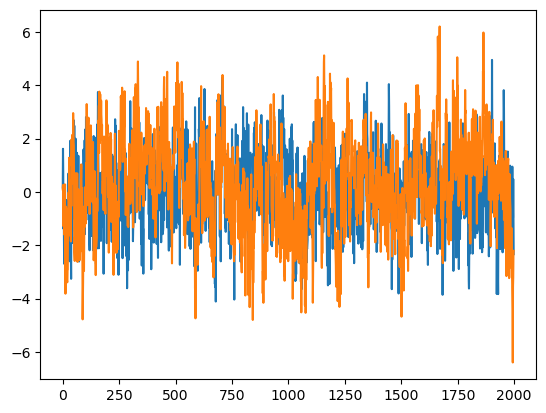

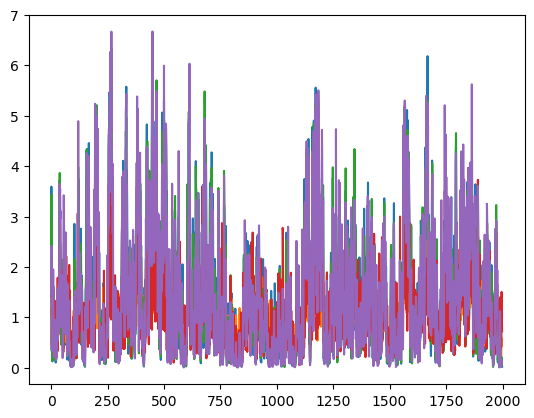

1.2604857279355934


In [31]:
# Simulate some data
torch.manual_seed(0)
np.random.seed(0)
N = 100
x_dim = 5

# sqrt m  division in matrix C 

# A = np.array([[0.9, 0.4], [-0.2, 0.8]])
# s = np.array([0.8, 0.99]).reshape(1, -1)
# u, _ = np.linalg.qr(np.random.randn(s.shape[1], s.shape[1]))
# A = u @ np.diag(s.squeeze()) @ u.T
eigs = np.array([-0.6, 0.2, 0.6, 0.8, 0.9])
A = np.diag(eigs)
u, _ = np.linalg.qr(np.random.randn(x_dim, x_dim))
A = u @ A @ u.T
print(A)

# B = np.array([[0.1, 0.0], [0.0, 0.1]])
B = 1 * np.eye(x_dim)
# W = np.eye(x_dim)
W = np.random.randn(x_dim, x_dim) / np.sqrt(x_dim)



# Have C to be multiple identity matrices
# C = np.vstack([np.eye(x_dim)] * (N//x_dim)) # Could also use random weights with std sqrt(m)
C = np.random.randn(N, x_dim) / np.sqrt(x_dim)

sigma_x = 0.01

# mu0 = np.array([0., 0.])
# Sigma0 = np.array([[.010, 0.0], [0.0, .010]])
mu0 = np.zeros(x_dim)
Sigma0 = 1 * np.eye(x_dim)
print(mu0.shape, Sigma0.shape)

ntrials = 1
# v0 = np.random.multivariate_normal(mu0, Sigma0)
v0 = mu0 + (np.linalg.cholesky(Sigma0) @ np.random.randn(ntrials,x_dim, 1)).squeeze(-1)

T = 2000
v = np.zeros((ntrials,x_dim,T))
x = np.zeros((ntrials,x_dim,T))
x_noise_free = np.zeros((ntrials,x_dim,T))
v[:,:, 0] = v0
x_noise_free[:,:, 0] = (W @ v0[..., None]).squeeze(-1)
x[:,:, 0] = (W @ v0[..., None]).squeeze(-1) + sigma_x * np.random.randn(ntrials, x_dim,)
for t in range(1, T):
    v[..., t] = (A @ v[..., t-1][..., None]).squeeze(-1) + (B @ np.random.randn(ntrials, x_dim,1)).squeeze(-1)
    x_noise_free[..., t] = (W @ v[..., t][..., None]).squeeze(-1)
    x[..., t] = (W @ v[..., t][..., None]).squeeze(-1) + sigma_x * np.random.randn(ntrials, x_dim)

stop = -1
plt.plot(v[-1,0,:stop])
plt.plot(v[-1,1,:stop])
plt.show()

_d = 0.5
F = C[None, ...] @ x + _d
# plt.plot(F[0,0,:stop])
# plt.plot(F[0,1,:stop])

# link = np.exp
link = lambda x: 1 * np.log(1 + np.exp(x))
dt = 1
for i in range(5):
    plt.plot(link(F[0,i,:stop])*dt)
plt.show()

# Average firing rate
print(np.mean(link(F)))


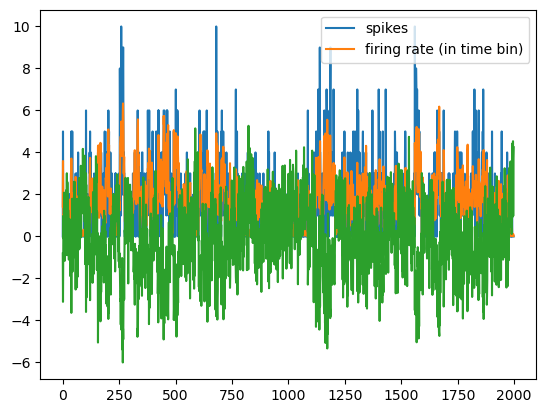

step 0 LL -1.9447065476190477
step 1 LL -1.9163104166666667
step 2 LL -1.8898686011904762
step 3 LL -1.8652918154761904
step 4 LL -1.8422738095238096
step 5 LL -1.820689880952381
step 6 LL -1.800523511904762
step 7 LL -1.7814313988095238
step 8 LL -1.763472767857143
step 9 LL -1.7465203869047619
step 10 LL -1.7303723214285713
step 11 LL -1.7151072916666668
step 12 LL -1.7004299107142857
step 13 LL -1.6864116071428572
step 14 LL -1.672913392857143
step 15 LL -1.6598572916666667
step 16 LL -1.6470995535714286
step 17 LL -1.634692113095238
step 18 LL -1.6224947916666668
step 19 LL -1.610548511904762
step 20 LL -1.5987287202380953
step 21 LL -1.5870697916666667
step 22 LL -1.5755677083333333
step 23 LL -1.5642230654761904
step 24 LL -1.5530619047619048
step 25 LL -1.5421010416666667
step 26 LL -1.5313659226190477
step 27 LL -1.5236723214285715
step 28 LL -1.510805505952381
step 29 LL -1.500979017857143
step 30 LL -1.4915293154761904
step 31 LL -1.4824870535714285
step 32 LL -1.473869494047

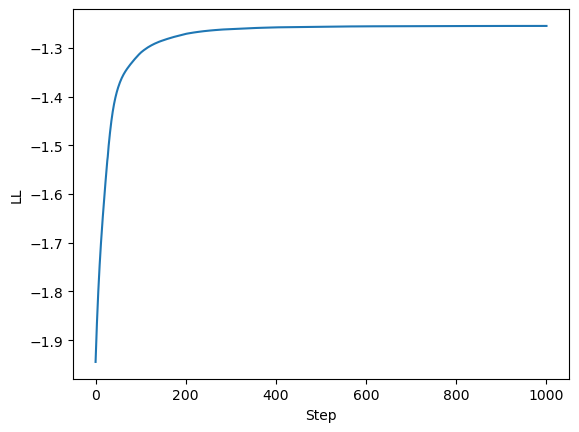

In [32]:
# link_fn = torch.exp
# link = lambda x: np.exp(x)
link_fn = lambda x: 1 * torch.nn.functional.softplus(x)
link = lambda x: 1 * np.log(1 + np.exp(x))
lik = Poisson_noise()
Y = np.random.poisson(link(F)*dt)

train_len = 1000
Y_train = Y[..., :train_len]
v_train = v[..., :train_len]
Y_test = Y[..., train_len:]
v_test = v[..., train_len:]


# sigma = 0.1
# Y = np.random.randn(*F.shape) * sigma + F
# lik = Gaussian_noise(sigma)
# link_fn = lambda x: x

# # Sigmoid link function
# link = lambda x: 1 / (1 + np.exp(-x))
# Y = np.random.negative_binomial(link(F), 0.5)
# lik = Negative_binomial_noise(Tensor(Y))
# link_fn = lambda x:x

plt.plot(Y[0,0,:stop], label='spikes')
# plt.plot(Y[0,1,:stop])
plt.plot(link(F[0,0,:stop])*dt, label='firing rate (in time bin)')
plt.plot(x_noise_free[0,0,:stop])
plt.legend()
plt.show()

_W = torch.tensor(np.random.randn(1,x_dim, x_dim) / np.sqrt(x_dim)).float().to(device)
_C = torch.tensor(np.random.randn(1,N, x_dim) / np.sqrt(x_dim)).float().to(device)

model = LDS(Tensor(v_train), Tensor(Y_train), lik, x_dim=x_dim, link_fn=link_fn, fixed_d=False, d=_d, W=_W, C=_C)
train_params = {'batch_size': None, 'n_mc': 500, 'step_size': 100, 'lrate': 1e-2, 'max_steps': 1001, 'gamma': 0.85, 'StepLR': True}
np.random.seed(0)
torch.manual_seed(0)
model.train_supervised_model(model.training_params(**train_params))
model.plot_LL()

# # Fixed generative model
# model = LDS(Tensor(v_train), Tensor(Y_train), lik, x_dim=x_dim, link_fn=link_fn, 
#             A=Tensor(A[None, ...]).to(device), B=Tensor(B[None, ...]).to(device), W=Tensor(W[None,...]).to(device), C=Tensor(C[None, ...]).to(device),
#             mu0=Tensor(mu0[None, ...]).to(device), Sigma0_half=Tensor(np.linalg.cholesky(Sigma0)[None, ...]).to(device),
#             sigma_x=(torch.ones(x_dim) * sigma_x).to(device), d=_d)

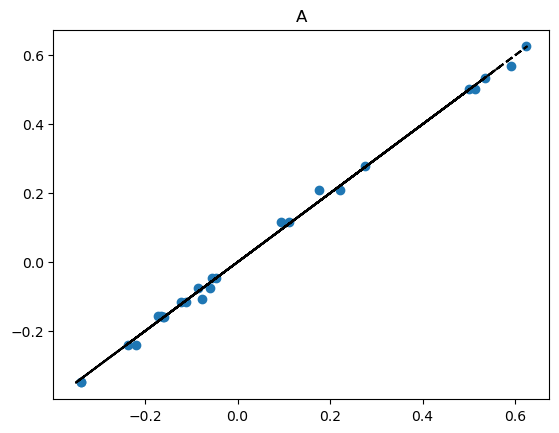

0.49646056 0.5


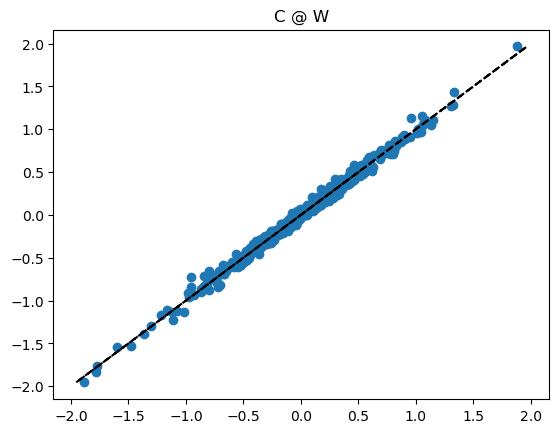

[[[ 0.12956266  0.10813221 -0.02125419  0.02436752 -0.02467657]
  [ 0.10233639  0.10386181 -0.02262242  0.03245674  0.02046753]
  [ 0.25636613  0.3121978   0.22190495 -0.17094597 -0.11601972]
  [-0.01955433 -0.00694793 -0.10608893  0.10736895  0.12491751]
  [-0.25791767 -0.1726606  -0.02038038  0.030271    0.18809843]]] [[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0. -0.  1.]]
tensor([0.1311, 0.1255, 0.1336, 0.1366, 0.1611], device='cuda:0',
       grad_fn=<ExpBackward0>) 0.01
[-0.03886208 -0.05079699  0.20892423 -0.08553302 -0.17714256] [0. 0. 0. 0. 0.]


In [33]:
# for name, prm in model.named_parameters():
#     if name in ['C', 'W']:
#         continue
#     print(f'Name: {name} - Shape: {prm.shape} - Parameter: {prm}')


# # print(C @ W )
# # print(model.C @ model.W)
# print((C@W - (model.C @ model.W).detach().cpu().numpy()))
# # print(C @ W)
# print(model.Sigma0)

plt.plot(model.A.detach().cpu().numpy().flatten(), A.flatten(), 'o')
# plot y = x line 
plt.plot(A.flatten(), A.flatten(), 'k--')
plt.title('A')
plt.show()

print(model.d.detach().cpu().numpy(), _d)

plt.plot((model.C @ model.W).detach().cpu().numpy().flatten(), (C @ W).flatten(), 'o')
# plot y = x line
plt.plot((C @ W).flatten(), (C @ W).flatten(), 'k--')
plt.title('C @ W')
plt.show()

print(model.Sigma0_half.detach().cpu().numpy(), np.linalg.cholesky(Sigma0))

print(model.sigma_x, sigma_x)

print(model.mu0.detach().cpu().numpy(), mu0)



torch.Size([1, 1, 5, 1000])


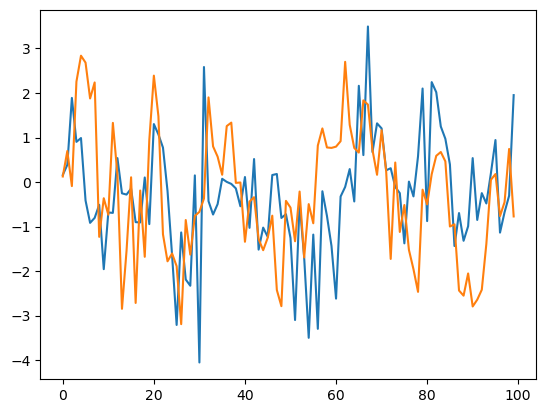

In [24]:
model.freeze_params()
z_samps = model.sample_z(1, trials=1)
print(z_samps.shape)
stop = 100
for i in range(len(z_samps)):
    plt.plot(z_samps[i,0,0, :stop].detach().cpu().numpy())
    plt.plot(z_samps[i,0,1, :stop].detach().cpu().numpy())
    plt.show()

In [10]:
# Load saved neural network
state_dict = torch.load('my_sequential_model.pth')

In [37]:

model.freeze_params()
print(model.x_dim)

# class MyRNNModel(Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MyRNNModel, self).__init__()
#         self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True, num_layers=2)
#         self.fc = torch.nn.Linear(hidden_size * 2, output_size)

#     def forward(self, x):
#         out, _ = self.rnn(x)
#         out = self.fc(out)
#         return out

# neural_net = MyRNNModel(model.N, 100, model.x_dim)

# # # Substituting the true parameters
# # neural_net = torch.nn.Sequential(
# #                 torch.nn.Linear(model.N, 100),
# #                 torch.nn.ReLU(),
# #                 torch.nn.Linear(100, 100),
# #                 torch.nn.ReLU(),
# #                 torch.nn.Linear(100, 100),
# #                 torch.nn.ReLU(),
# #                 # torch.nn.Linear(100, 100),
# #                 # torch.nn.ReLU(),
# #                 torch.nn.Linear(100, model.x_dim)
# #             )
# # # neural_net.load_state_dict(state_dict)
# # # rec_model = RecognitionModel(model, neural_net=neural_net)

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True) # needs ntrials, T, N
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out

neural_net = RNNModel(model.N, 100, model.x_dim)
# neural_net.load_state_dict(state_dict)

rec_model = RecognitionModel(model, rnn=True)
train_params = {'batch_size': None, 'step_size': 100, 'lrate': 1e-3, 'max_steps': 101, 'n_mc_x': 50, 'n_mc_z': 50, 'batch_mc_z': 25}
rec_model.train_recognition_model(rec_model.training_params(**train_params))
rec_model.plot_LL()

5
step 0 LL -1.673326640625
step 1 LL -1.640432578125
step 2 LL -1.616255703125
step 3 LL -1.6015675
step 4 LL -1.5878221875
step 5 LL -1.575480703125
step 6 LL -1.564153671875
step 7 LL -1.55302640625
step 8 LL -1.541167109375
step 9 LL -1.530699765625
step 10 LL -1.522451875
step 11 LL -1.51634390625
step 12 LL -1.50841390625
step 13 LL -1.501347265625
step 14 LL -1.4987215625
step 15 LL -1.494655
step 16 LL -1.491915703125
step 17 LL -1.492336171875
step 18 LL -1.4884159375
step 19 LL -1.4862565625
step 20 LL -1.48533328125
step 21 LL -1.4841859375
step 22 LL -1.48466625
step 23 LL -1.482188046875
step 24 LL -1.480795546875
step 25 LL -1.478144140625
step 26 LL -1.47929359375
step 27 LL -1.477002890625
step 28 LL -1.47666546875
step 29 LL -1.47416453125
step 30 LL -1.472930703125
step 31 LL -1.472962265625
step 32 LL -1.4703021875
step 33 LL -1.46683703125
step 34 LL -1.468779609375
step 35 LL -1.467482421875
step 36 LL -1.466110625
step 37 LL -1.46812546875


KeyboardInterrupt: 

torch.Size([1, 100, 1000])


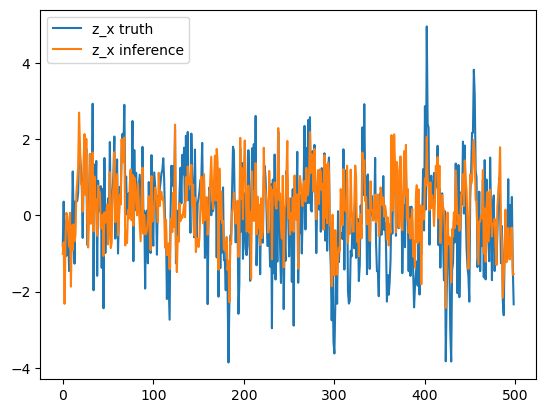

0.5358595846872738 z_0
0.8294652842628556 z_1
0.7971752683067892 z_2
0.9025912170009821 z_3
0.5097372253999762 z_4
(1, 5, 2000)


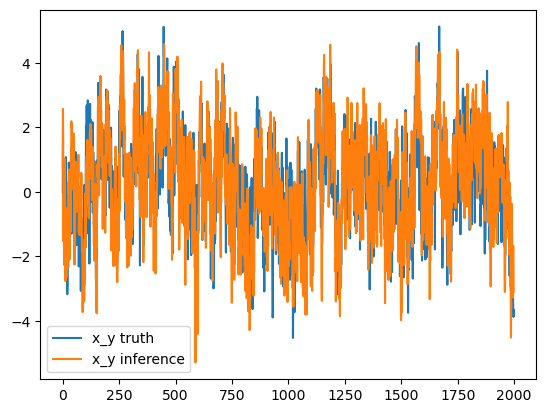

-2.2036695012850536 x_0
0.1574514351475268 x_1
-1.8058016543597724 x_2
-1.7058560184799956 x_3
-3.9422854202957813 x_4


IndexError: index 1000 is out of bounds for dimension 0 with size 1000

In [38]:
print(rec_model.gen_model.Y.shape)
z = rec_model.test_z(Tensor(Y).to(device))
z = z.detach().cpu().numpy()

start = 1500
stop = -1
plt.plot(v[0,0,start:stop], label = 'z_x truth')
# plt.plot(v[0,1,:100], label = 'z_y truth')
plt.plot(z[0,0,start:stop], label = 'z_x inference')
# plt.plot(z[0,1,:100], label = 'z_y inference')
plt.legend()
plt.show()

# for i in range(5):
#     plt.plot(z[0,i,:stop], label = 'z_x inference')
# plt.show()
# for i in range(5):
#     plt.plot(v[0,i,:stop], label = 'z_x truth')   
#     # plt.legend()
# plt.show()

# print R^2 for x and y decoding using sklearn
# print(r2_score(v[0,1,:], z[0,1,:]))
# print(r2_score(v[0,0,:], z[0,0,:]))
for i in range(rec_model.gen_model.b):
    print(r2_score(v[0,i,:], z[0,i,:]), 'z_{}'.format(i))

x_tilde = rec_model.get_x_tilde(Tensor(Y).to(device)).detach().cpu().numpy()
print(x_tilde.shape)
stop = -1
# plt.plot(x_noise_free[0,0,:stop], label = 'x_x truth')
# plt.plot(x_tilde[0,0,:stop], label = 'x_x inference')
plt.plot(x_noise_free[0,1,:stop], label = 'x_y truth')
plt.plot(x_tilde[0,1,:stop], label = 'x_y inference')
plt.legend()
plt.show()
# print R^2 for x_tilde
for i in range(rec_model.gen_model.x_dim):
    print(r2_score(x_noise_free[0,i,:], x_tilde[0,i,:]), 'x_{}'.format(i))
# print(r2_score(x_noise_free[0,0,:], x_tilde[0,0,:]), 'x_x')
# print(r2_score(x_noise_free[0,1,:], x_tilde[0,1,:]), 'x_y')
# print(r2_score(x_noise_free, x_tilde), 'x_all')

_, _, Ks, Cs = rec_model.kalman_covariance() # TODO: should I use prev_mu and prev_Sigma?
_ , mus_smooth, _ = rec_model.kalman_means(Tensor(x_noise_free[None, ...]).to(device), Ks, Cs) # (T_test, 1, ntrials, b)
# _ , mus_smooth, _ = rec_model.kalman_means(Tensor(x[None, ...]).to(device), Ks, Cs) # (T_test, 1, ntrials, b)
mus_smooth = mus_smooth.detach().cpu().numpy().squeeze(1).transpose(1, 2, 0)
print(mus_smooth.shape)
stop = 100
plt.plot(v[0,0,:stop], label = 'z_x truth')
plt.plot(mus_smooth[0, 0,:stop], label = 'z_x inference')
plt.plot(v[0,1,:stop], label = 'z_y truth')
plt.plot(mus_smooth[0, 1,:stop], label = 'z_y inference')
plt.legend()
plt.show()

# print R^2 for x and y smoothing using sklearn
print(r2_score(v[0,1,:], mus_smooth[0, 1,:]))
print(r2_score(v[0,0,:], mus_smooth[0, 0,:]))


In [ ]:
# Checking what sampled posteriors look like
matheron_pert = rec_model.sample_matheron_pert(100)
print(matheron_pert.shape)
x_hat = Tensor(x[None, ...]).to(device) - matheron_pert[..., :x_tilde.shape[-1]]
print(x_hat.shape)
_, _, Ks, Cs = rec_model.kalman_covariance() # TODO: should I use prev_mu and prev_Sigma?
_ , _mus_smooth, _ = rec_model.kalman_means(x_hat, Ks, Cs) # (batch_size, n_mc_z, ntrials, b)
_mus_smooth = _mus_smooth.permute(1,2,3,0).squeeze().detach().cpu().numpy()
print(_mus_smooth.shape)


# # Find the prior mean
# z_samps = model.sample_z(10000)
# z_samps = z_samps.squeeze().detach().cpu().numpy()
# print(z_samps.shape)

torch.Size([100, 1, 2, 5000])
torch.Size([100, 1, 2, 5000])
(100, 2, 5000)


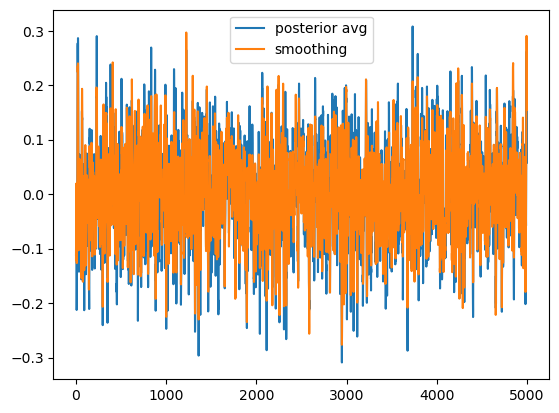

0.7522298766551174
0.86521357134445


In [ ]:
# stop = 100
# for i in range(len(_mus_smooth)):
#     plt.plot(_mus_smooth[i,0,:stop])
#     # plt.plot(_mus_smooth[i,0,1,:stop])
#     # plt.show()
# plt.show()

stop = -1
posterior_avg = _mus_smooth.mean(0)
prior_avg = z_samps.mean(0)
plt.plot(posterior_avg[0,:stop], label = 'posterior avg')
plt.plot(mus_smooth[0,:stop], label = 'smoothing')
# plt.plot(prior_avg[0,:stop], label = 'prior avg')
# plt.plot(z_samps[0,0,:stop], label = 'prior sample')
plt.legend()
plt.show()
# print R^2 between posterior mean and smoothing
print(r2_score(mus_smooth[0,:], posterior_avg[0,:]))
print(r2_score(mus_smooth[1,:], posterior_avg[1,:]))

In [ ]:
# # Natural parameters for p(v_t|v_{t-1})
# mus = self.A @ v[... , :-1] # (ntrials, b, T-1)
# # print(mu.shape, self.Q.shape)
# second_big = torch.zeros(ntrials).to(device)
# for t in range(T-1): # TODO, can we vectorize this?
#     dist = MultivariateNormal(mus[..., t], self.Q)
#     second_big += dist.log_prob(v[..., t+1])

# # # Replace the for loop with this code
# # dist = MultivariateNormal(mus, self.Q[..., None])
# # second_big = dist.log_prob(v[..., 1:]).sum(dim=-1)

mus = torch.zeros(4, 2, 9)
Q = torch.eye(2)[None, ...]
# Q = Q.expand(4, -1, -1)
v = torch.zeros(4, 2, 10)
print(mus.shape, Q.shape)

T = 10
second_big = torch.zeros(4)
for t in range(T-1): # TODO, can we vectorize this?
    print(mus[..., t].shape, Q.shape)
    dist = MultivariateNormal(mus[..., t], Q)
    second_big += dist.log_prob(v[..., t+1])

print(second_big.shape, second_big)

# Replace the for loop with this code
# dist = MultivariateNormal(mus, Q[..., None].expand(-1, -1, -1, mus.shape[-1]))
# second_big = dist.log_prob(v[..., 1:]).sum(dim=-1)
# print(second_big.shape, second_big)
# mus = mus.transpose(-1,-2)
# print(mus.shape)
mus = mus.transpose(-1,-2)
# Q = Q[:, None, ...].expand(-1, mus.shape[1], -1, -1)
Q = Q[:, None, ...]
print(Q.shape, mus.shape)
dist = MultivariateNormal(mus, Q)
v = v[..., 1:].transpose(-1,-2)
print(v.shape)
second_big = dist.log_prob(v).sum(dim=-1)
print(second_big.shape, second_big)


torch.Size([4, 2, 9]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4]) tensor([-16.5409, -16.5409, -16.5409, -16.5409])
torch.Size([1, 1, 2, 2]) torch.Size([4, 9, 2])
torch.Size([4, 9, 2])
torch.Size([4]) tensor([-16.5409, -16.5409, -16.5409, -16.5409])


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import abc
from torch.distributions import MultivariateNormal, Poisson
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import Module
from torch import nn
from torch.optim.lr_scheduler import StepLR
from main import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import pickle
from scipy.interpolate import CubicSpline

torch.set_default_dtype(torch.float64)

from sklearn.metrics import r2_score
import dill

In [2]:
# Train 4G10 model
# z = np.load('4G10_z.npy')
# z = z.transpose(1,0, 2)
z = np.load('4G10_z_ayush.npy')
print(z.shape)
z = torch.Tensor(z)

Y_train = np.load('neural_train.npy')
Y_train = Y_train.transpose(1,0,2)
Y_train = torch.Tensor(Y_train)
print(Y_train.shape)

Y_test = np.load('neural_test.npy')
Y_test = Y_test.transpose(1,0,2)
Y_test = torch.Tensor(Y_test)
print(Y_test.shape)



(400, 10, 16)
torch.Size([400, 162, 16])
torch.Size([100, 162, 16])


In [3]:


# min_firing_rate = 0.1 # Hz
min_firing_rate = 0. # Hz
T_trial = 16 * 50 /1000 # seconds
print(Y_train.mean(dim=(0, 2))/T_trial)
_Y_train = Y_train[:, Y_train.mean(dim=(0, 2))/T_trial > min_firing_rate, :]
_Y_test = Y_test[:, Y_train.mean(dim=(0, 2))/T_trial > min_firing_rate, :]
print(_Y_train.shape)
print(_Y_test.shape)

tensor([0.1023, 0.1711, 0.5150, 0.1553, 0.3377, 0.0291, 0.2096, 0.8529, 0.5342,
        0.4148, 0.1994, 0.0303, 0.0791, 1.2572, 0.0910, 0.8965, 0.3662, 0.0525,
        0.0348, 0.2645, 0.1555, 0.7842, 1.3041, 0.3535, 0.4150, 0.2262, 0.3520,
        0.5375, 0.2432, 0.4504, 0.0123, 0.2645, 0.1229, 0.1521, 0.3779, 0.2332,
        0.0055, 0.7191, 0.0266, 0.1424, 0.2758, 0.3250, 0.1600, 0.1961, 0.2400,
        0.5227, 0.1855, 0.1615, 0.1412, 0.4430, 0.3865, 0.3096, 0.4412, 0.2895,
        0.0170, 0.4852, 0.2123, 0.5924, 0.0334, 0.1574, 0.1877, 0.2029, 0.0656,
        0.3236, 0.4859, 0.3006, 0.6943, 0.3084, 0.0090, 0.4633, 0.0941, 0.2191,
        0.2338, 0.4986, 0.1295, 0.9152, 0.3830, 0.1848, 0.0555, 0.3355, 0.0492,
        0.0262, 0.4537, 0.0551, 0.1014, 0.2844, 0.3187, 0.0793, 0.4197, 0.3180,
        0.0650, 0.5121, 0.7711, 0.1262, 0.8074, 0.2336, 0.3979, 0.2195, 0.1879,
        0.3779, 0.1301, 0.2045, 0.0820, 0.2865, 0.6920, 0.2469, 0.0687, 0.3035,
        0.2936, 0.3449, 0.1834, 0.0836, 

162 16 500 10 100


step 0 LL -3.6966280061969483
step 1 LL -2.3967763647940274
step 2 LL -2.479580198202347
step 3 LL -2.0598700852266307
step 4 LL -1.8607764734776475
step 5 LL -1.6381220450067393
step 6 LL -1.5498024464094635
step 7 LL -1.5196352659797756
step 8 LL -1.431456707212085
step 9 LL -1.3084959663989537
step 10 LL -1.2462548083700093
step 11 LL -1.202535353793321
step 12 LL -1.1607650950606263
step 13 LL -1.1158387325829502
step 14 LL -1.0849312592721763
step 15 LL -1.0590855363586982
step 16 LL -1.0218086125345838
step 17 LL -0.9856071696762507
step 18 LL -0.9634233443479581
step 19 LL -0.9450251380171224
step 20 LL -0.9232302154561212
step 21 LL -0.9082986833771832
step 22 LL -0.8951813795324322
step 23 LL -0.872505678118628
step 24 LL -0.8548275191370035
step 25 LL -0.8507836539121868
step 26 LL -0.8402817360356676
step 27 LL -0.8224370284176787
step 28 LL -0.8172629730805724
step 29 LL -0.8092855221739355
step 30 LL -0.7969492126688975
step 31 LL -0.7939125823000402
step 32 LL -0.78874615

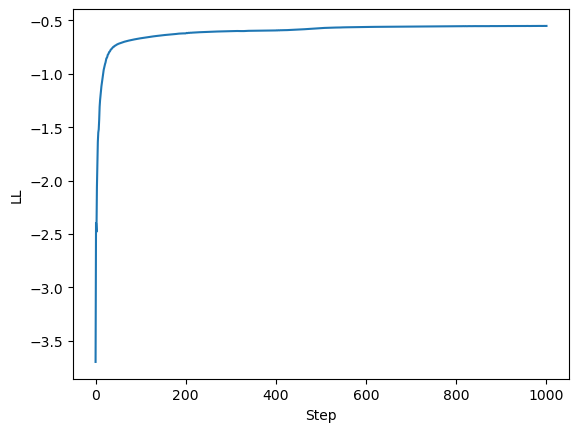

In [6]:
A = np.load('A.npy')
A = torch.Tensor(A[None, ...]).to(device)
Q = np.load('Q.npy')
B = np.linalg.cholesky(Q)
B = torch.Tensor(B[None, ...]).to(device)
mu0 = np.load('mu0.npy')
mu0 = torch.Tensor(mu0[None, ...]).to(device)
Sigma0 = np.load('Sigma0.npy')
Sigma0_half = np.linalg.cholesky(Sigma0)
Sigma0_half = torch.Tensor(Sigma0_half[None, ...]).to(device)

np.random.seed(0)
torch.manual_seed(0)

link_fn = torch.functional.F.softplus
# link_fn = torch.exp
lik = Poisson_noise()
# x_dim = 162
x_dim = 500
_W = torch.randn(1, x_dim,10).to(device) / np.sqrt(10)

# # # link_fn = lambda x: x
# def link_fn(x):
#     return x
# lik = Gaussian_noise(0.1)
# x_dim = 162
# # _W = torch.randn(1, x_dim,10).to(device) / np.sqrt(10)
# _W = torch.tensor(np.load('4G10D.npy')[None, ...]).to(device)
# _Y_train = _Y_train - torch.mean(_Y_train, dim=2, keepdim=True)

# link_fn = lambda x: x
# lik = Negative_binomial_noise(Tensor(_Y_train))


# # model = LDS(z, _Y_train, lik, link_fn=link_fn)

model = LDS(z[:100, ...], _Y_train[:100, ...], lik, link_fn=link_fn, A=A, B=B, mu0=mu0, Sigma0_half=Sigma0_half, trained_z=True, fixed_d=False, x_dim=x_dim, single_sigma_x=False, full_R=False)
# model.C.requires_grad = False

# model = dill.load(open('4g10datamodels/poisson_big.pkl', 'rb'))
# model.freeze_params()
# model.log_sigma_x.requires_grad = True
# model.W.requires_grad = True
# model.d.requires_grad = True

print(model.N, model.T, model.x_dim, model.b, model.ntrials)
# train_params = {'batch_size': None, 'n_mc': 100, 'lrate': 7.5e-2, 'max_steps': 1001, 'step_size': 200}
# train_params = {'batch_size': None, 'n_mc': 50, 'lrate': 5e-3, 'max_steps': 1001, 'step_size': 200, 'StepLR': True}
train_params = {'batch_size': None, 'n_mc': 25, 'lrate': 5e-3, 'max_steps': 1001, 'step_size': 200, 'StepLR': True}

# for prm in model.parameters():
#     prm.requires_grad = True

model.train_supervised_model(model.training_params(**train_params))
model.plot_LL()

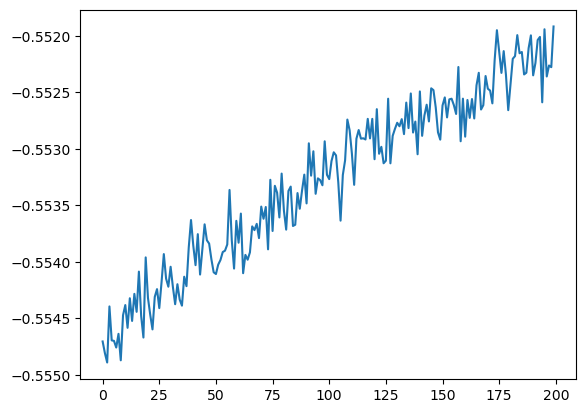

In [7]:
plt.plot(model.LLs[-200:])
plt.show()

In [31]:
# pickle.dump(model, open('4g10datamodels/gaussian.pkl', 'wb'))
# dill.dump(model, open('4g10datamodels/gaussian.pkl', 'wb'))
# model = dill.load(open('4g10datamodels/gaussian.pkl', 'rb'))
# model = pickle.load(open('4g10datamodels/poisson_gen_model_working.pkl', 'rb'))
# pickle.dump(model, open('4g10datamodels/poisson_new_good.pkl', 'wb'))
# dill.dump(model, open('4g10datamodels/poisson_big.pkl', 'wb'))
model = dill.load(open('4g10datamodels/poisson_big.pkl', 'rb'))

# dill.dump(model, open('4g10datamodels/poisson_big_finetune.pkl', 'wb'))

tensor([[  2.9626,   0.8192,  -3.6040,  -0.4994,   0.8571,   0.5385,   0.7267,
           3.0445,  -4.4484,  -0.2024,   0.6059,  -1.2968,   1.0660,  -2.9783,
          -0.0224,  -7.5014,  -0.2629,   0.6396,  -0.1748,   2.5637,   0.8765,
          -1.0718,   3.8415,  -5.1946,  -4.3163, -11.0006,  -5.5825,   3.4919,
          -4.4703,   2.3840,   0.2387,   0.3855,  -1.7121,   1.0409,   1.0262,
           1.2385,   0.5288,  -0.1825,  -0.4420,  -0.5272,   4.5019,   4.3814,
           1.5625,   1.1565,  -1.9295,  -2.8746,   0.9776,   2.0266,   0.1948,
           1.8746,  -0.5019,   1.3931,   1.9013,  -0.4147,   0.1678,   2.1863,
           1.4069,   2.3700,   0.3745,   1.1834,  -2.2509,  -0.1144,   1.1233,
           1.9575,   2.5251,   2.2633,  -0.1923,  -2.9620,  -0.1793,   2.5652,
           1.0721,  -0.0647,   0.5996,  -2.2639,   0.5833,  -0.0924,  -0.6278,
           0.4165,  -1.4000,   1.2400,   0.5977,  -0.2637,   0.2655,   0.8613,
          -0.1201,   0.8202,   0.2325,   0.0393,  -1

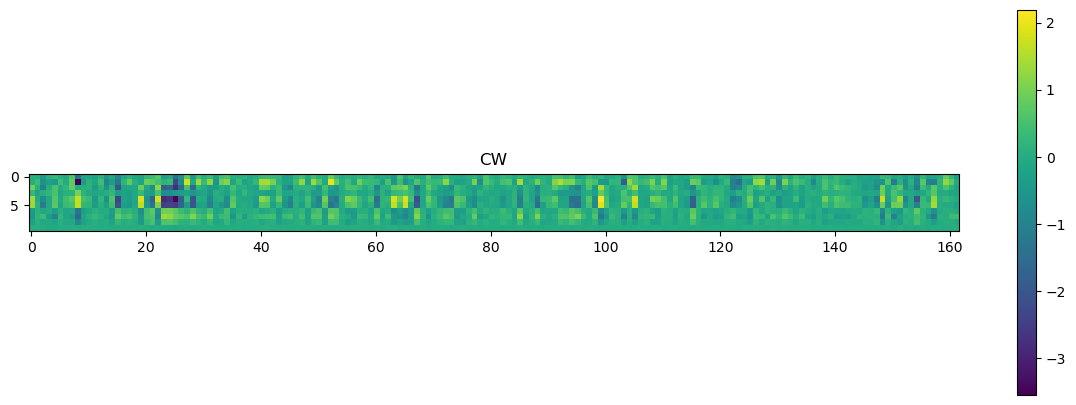

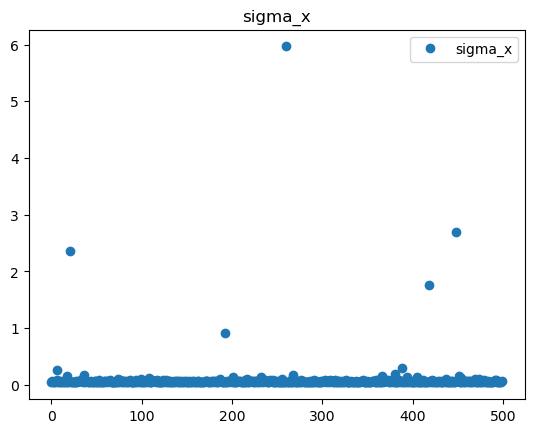

ValueError: x and y must have same first dimension, but have shapes torch.Size([162]) and (500,)

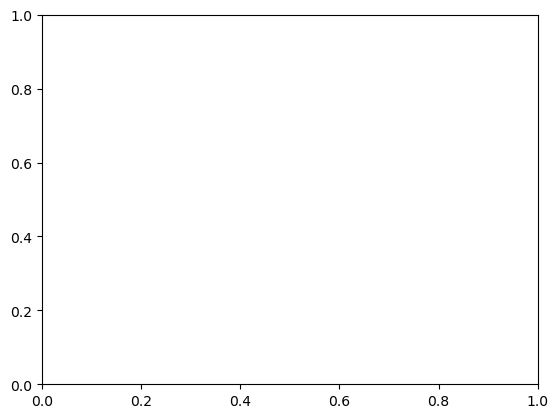

In [8]:
# model.freeze_params()

# for name, prm in model.named_parameters():
#     print(f'Name: {name} - Shape: {prm.shape} - Parameter: {prm}')

# # print(Q - (B @ B.transpose(-1,-2)).detach().cpu().numpy())
# print('d', model.d)
# print('sigma_x', model.sigma_x)
# print('Q', torch.diag(model.Q[0]))
print((model.C @ model.W).sum(axis=-1))
# print(model.lik.sigma)

# # print(torch.linalg.det(model.Sigma0))
# # # min eigenvalue of Sigma0
# # min_abs_eigenvalue = torch.abs(torch.linalg.eigvals(model.Sigma0)).min()
# # print(min_abs_eigenvalue)

# # # print(model.lik.total_count)

# # print(model.Q)

# -------------------

# plt.imshow(model.W[0].detach().cpu().numpy())
# plt.colorbar()
# plt.title('W')
# plt.show()

# plt.figure(figsize=(15, 5))  # Adjust as needed
# plt.imshow(model.C[0].detach().cpu().numpy().T)
# plt.colorbar()
# plt.title('C')
# plt.show()

plt.figure(figsize=(15, 5))  # Adjust as needed
plt.imshow((model.C @ model.W)[0].detach().cpu().numpy().T)
plt.colorbar()
plt.title('CW')
plt.show()

# plt.figure(figsize=(15, 5))  # Adjust as needed
# m = dill.load(open('4g10datamodels/poisson_big.pkl', 'rb'))
# plt.imshow((m.C @ m.W)[0].detach().cpu().numpy().T)
# plt.colorbar()
# plt.title('CW')
# plt.show()

# plt.figure(figsize=(15, 5))  # Adjust as needed
# plt.imshow((m.C @ m.W)[0].detach().cpu().numpy().T - (model.C @ model.W)[0].detach().cpu().numpy().T)
# plt.colorbar()
# plt.title('CW delta')
# plt.show()

plt.plot(model.sigma_x.detach().cpu().numpy(), 'o', label='sigma_x')
plt.title('sigma_x')
# plot neuron firing rates
# plt.plot(_Y_train.mean(dim=(0,2))/T_trial, 'x', label='firing rates')
plt.legend()
plt.show()

plt.plot(_Y_train.mean(dim=(0,2))/T_trial, model.sigma_x.detach().cpu().numpy(), 'o')
plt.xlabel('firing rates')
plt.ylabel('sigma_x')
plt.show()


print(model.d, 'd')
# print(model.lik.sigma, 'sigma')
print(min(model.sigma_x), max(model.sigma_x), 'sigma_x')

torch.Size([3, 400, 10, 16])


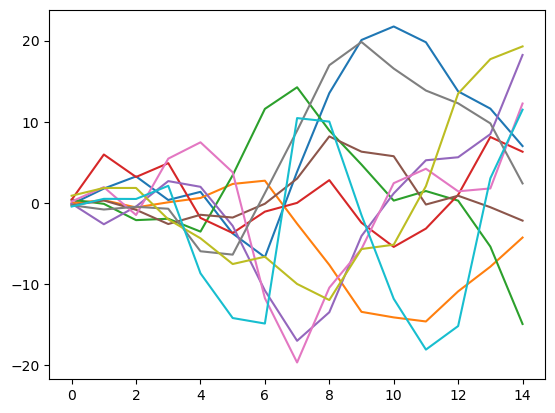

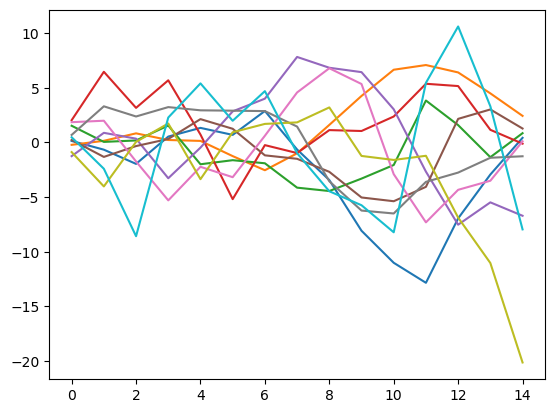

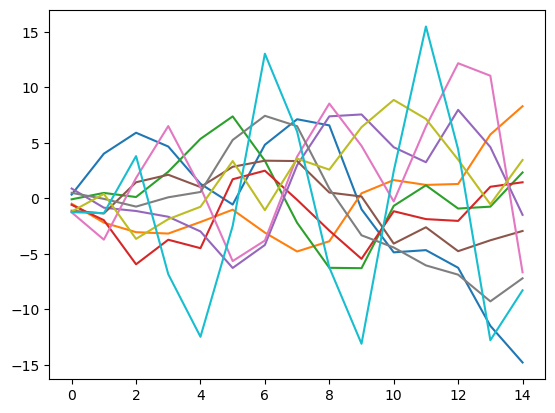

In [10]:
z_samps = model.sample_z(3)
print(z_samps.shape)
stop = -1
for i in range(len(z_samps)):
    for j in range(10):
        plt.plot(z_samps[i,0,j, :stop].detach().cpu().numpy())
    plt.show()

In [9]:
model.freeze_params()
torch.manual_seed(0)
np.random.seed(0)
class MyRNNModel(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyRNNModel, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True, num_layers=2)
        self.fc = torch.nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out

neural_net = MyRNNModel(model.N, 100, model.x_dim)

# rec_model = RecognitionModel(model, rnn=True, neural_net=neural_net)
rec_model = RecognitionModel(model, rnn=True)
# train_params = {'batch_size': 100, 'step_size': 10, 'lrate': 1e-2, 'max_steps': 1001, 'n_mc_x': 20, 'n_mc_z': 20, 'batch_mc_z': 20}
train_params = {'batch_size': 100, 'step_size': 100, 'lrate': 2e-3, 'max_steps': 1001, 'n_mc_x': 10, 'n_mc_z': 10, 'batch_mc_z': 10}
rec_model.train_recognition_model(rec_model.training_params(**train_params))
rec_model.plot_LL()

step 0 LL -0.8618553525234574
step 1 LL -0.9952738011951312
step 2 LL -0.8654697066153664
step 3 LL -0.8665010634501373
step 4 LL -0.8622843799265545
step 5 LL -0.8650930026140987
step 6 LL -0.8633809090227791
step 7 LL -0.8571712061668584
step 8 LL -0.8574305052795587
step 9 LL -0.8599234611967068
step 10 LL -0.8572723072502532
step 11 LL -0.8527783269556963
step 12 LL -0.8540276821297582
step 13 LL -0.8563063719357954
step 14 LL -0.8565276469126574
step 15 LL -0.8522144583353645
step 16 LL -0.8530325578946154
step 17 LL -0.8521042982667186
step 18 LL -0.8525340561803868
step 19 LL -0.8523820703697109
step 20 LL -0.8523682465448096
step 21 LL -0.8522216127409543
step 22 LL -0.850282652667927
step 23 LL -0.8490162045285466
step 24 LL -0.8492465012459479
step 25 LL -0.8508044807169127
step 26 LL -0.8497597344333984
step 27 LL -0.8484473846366457
step 28 LL -0.8486543894415175
step 29 LL -0.848301932946725
step 30 LL -0.8472830558353425
step 31 LL -0.846656795642426
step 32 LL -0.8470732

KeyboardInterrupt: 

(100, 10, 16)
(2, 10)
(100, 2, 16)


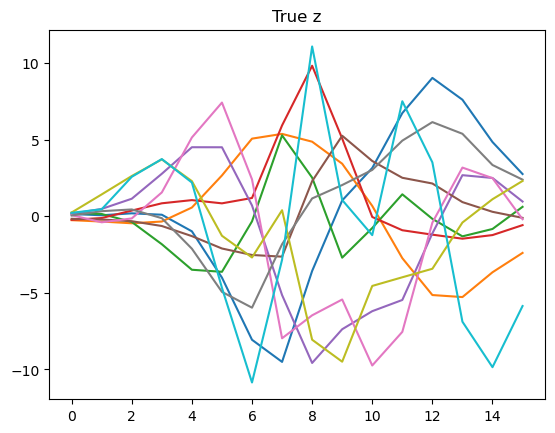

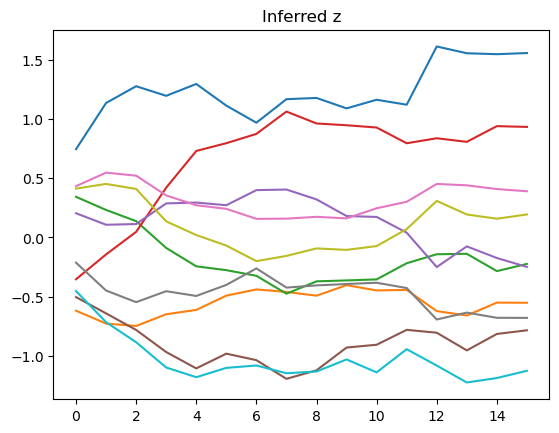

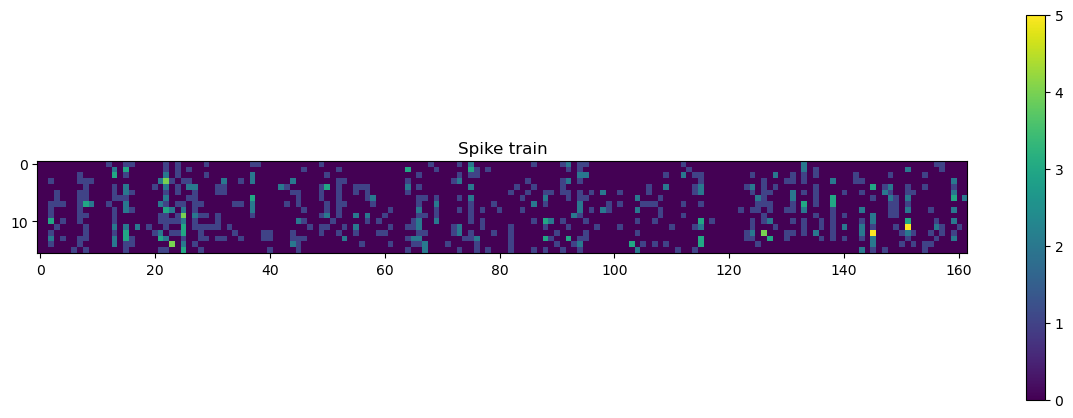

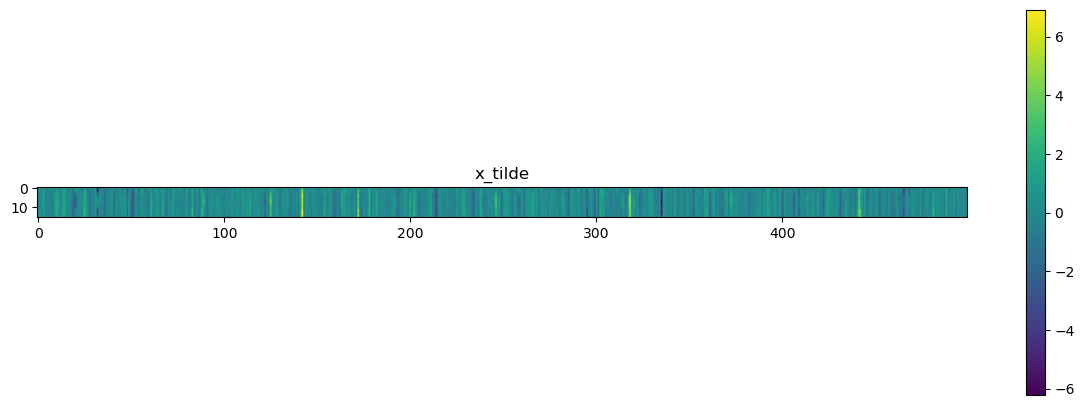

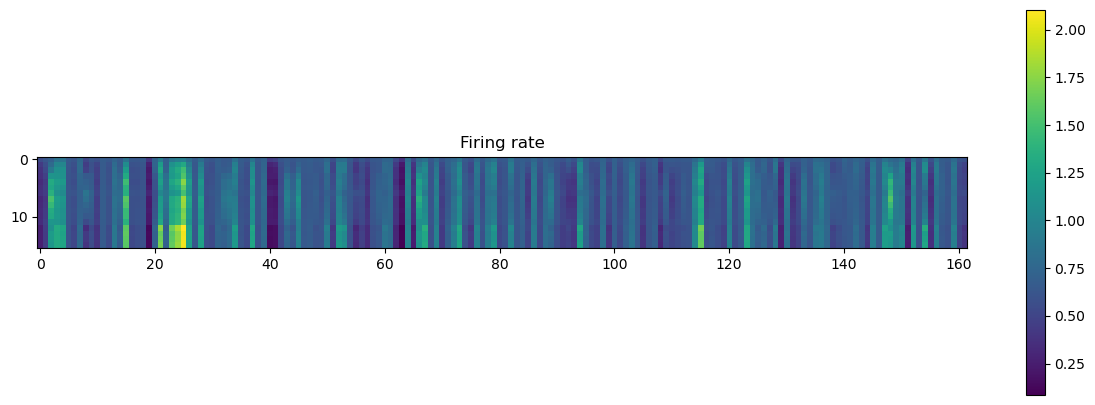

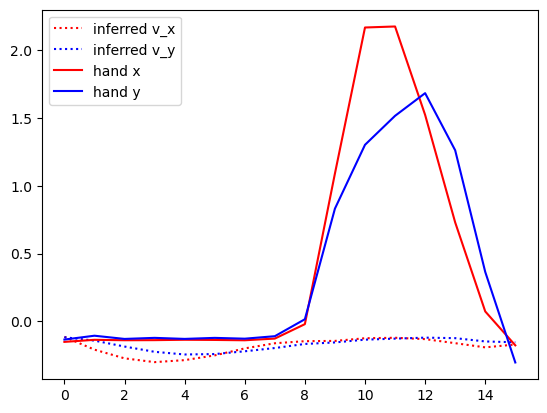

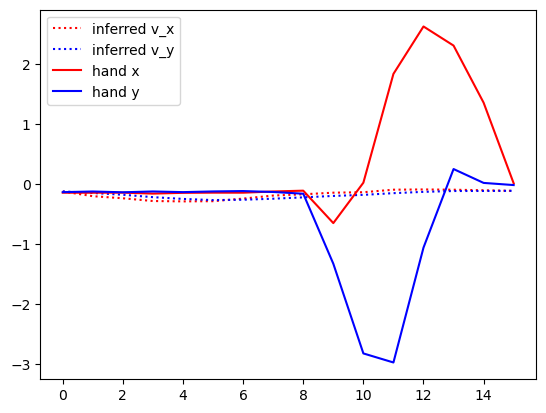

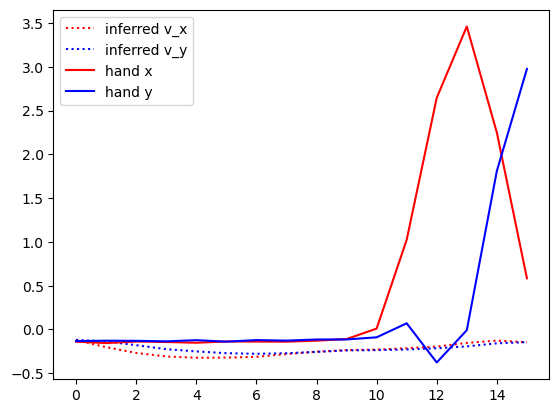

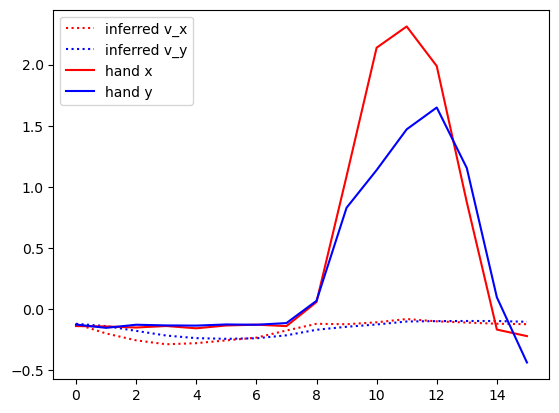

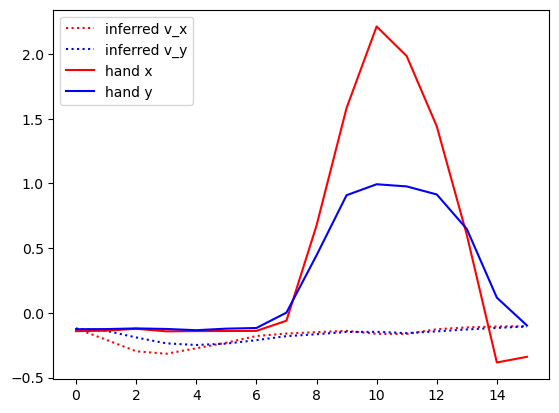

ValueError: Found input variables with inconsistent numbers of samples: [6400, 1600]

In [10]:
# rec_model = m
rec_model.freeze_params()
z = rec_model.test_z(rec_model.gen_model.Y)
# z = rec_model.test_z(Tensor(_Y_test).to(device))
z = z.detach().cpu().numpy()
print(z.shape)

C = np.load('C.npy')
print(C.shape)
v = (C[None, ...] @ z)
print(v.shape)

hand_train = np.load('hand_train.npy')
hand_train = hand_train.transpose(1,0,2)

true_z = np.load('4G10_z_ayush.npy')
for trial in range(1):
    for j in range(10):
        plt.plot(true_z[trial, j, :])
plt.title('True z')
plt.show()
for trial in range(1):
    for j in range(10):
        plt.plot(z[trial, j, :])
plt.title('Inferred z')
plt.show()

for trial in range(1):
    plt.figure(figsize=(15, 5))  # Adjust as needed
    plt.imshow(_Y_train[trial].T)
    plt.colorbar()
    plt.title('Spike train')
    plt.show()
    plt.figure(figsize=(15, 5))  # Adjust as needed
    plt.imshow(rec_model.get_x_tilde(rec_model.gen_model.Y).detach().cpu().numpy()[trial].T)
    plt.colorbar()
    plt.title('x_tilde')
    plt.show()
    plt.figure(figsize=(15, 5))  # Adjust as needed
    plt.imshow(model.link_fn(model.C @ model.W @ Tensor(z[trial]).to(device)).detach().cpu().numpy().T)
    plt.colorbar()
    plt.title('Firing rate')
    plt.show()


for trial in range(5):
    plt.plot(v[trial,0,:], label = 'inferred v_x', color='red', linestyle='dotted')
    plt.plot(v[trial,1,:], label = 'inferred v_y', color='blue', linestyle='dotted')
    plt.plot(hand_train[trial,0,:], label = 'hand x', color='red')
    plt.plot(hand_train[trial,1,:], label = 'hand y', color='blue')
    plt.legend()
    plt.show()

# trials = 400
v_dim = 2

print('x train', r2_score(hand_train[:,0,:].flatten(), v[:,0,:].flatten()))
print('y train', r2_score(hand_train[:,1,:].flatten(), v[:,1,:].flatten()))
# r2_scores = np.zeros((v_dim, trials))
# for trial in range(trials):
#     for i in range(v_dim):
#         r2_scores[i, trial] = r2_score(hand_train[trial,i,:], v[trial,i,:])

# # Only consider where r_2 > 0
# print(r2_scores[0][r2_scores[0] > 0].mean())
# print(r2_scores[1][r2_scores[1] > 0].mean())

# def r2(true, pred):
#     return 1 - np.linalg.norm(true - pred, ord='fro')/np.linalg.norm(true - np.mean(true, axis=(-1)), ord='fro')

# for i in range(v_dim):
#     print(r2(hand_train[:,i,:], v[:,i,:]))

cw_v = np.load('KF.npy')
z_test = rec_model.test_z(Tensor(_Y_test).to(device))
z_test = z_test.detach().cpu().numpy()
v_test = (C[None, ...] @ z_test).transpose(1,0,2)
print(v_test.shape)

r2_scores = np.zeros((v_dim, trials))
for trial in range(v_test.shape[1]):
    for i in range(v_dim):
        r2_scores[i, trial] = r2_score(cw_v[i,trial,:], v_test[i,trial,:])
print(r2_scores[r2_scores > 0].mean())


In [ ]:
# D = np.load('4G10D.npy')
# S = np.load('4G10S.npy')
# R = torch.Tensor([[0.00038472, 0.00013821], [0.00013821, 0.00043925]]).to(device)
# _, _, Ks, Cs = general_kalman_covariance(A, W, Q, R, 10, 162, p.Sigma0, 10000, smoothing=True)
# _ , mus_smooth, _ = general_kalman_means(p.A, p.W, p.z_dim, p.mu0, Tensor(v[None, ...]).to(device), Ks, Cs=Cs, smoothing=True)


In [40]:
# pickle.dump(rec_model, open('4g10datamodels/gaussian_rec.pkl', 'wb'))
# pickle.dump(rec_model, open('4g10datamodels/poisson_big_finetune_rec.pkl', 'wb'))
dill.dump(rec_model, open('4g10datamodels/poisson_big_rec.pkl', 'wb'))

In [27]:
# m = pickle.load(open('4G10data_gen_model.pkl', 'rb'))
# print(m.sigma_x)

# m = pickle.load(open('4G10data_rec_model.pkl', 'rb'))
# for prm in m.gen_model.parameters():
#     print(prm)
# print(m.gen_model.d)
# print((m.gen_model.C @ m.gen_model.W).sum(axis=-1))
# pickle.dump(m.gen_model, open('4g10datamodels/poisson_gen_model_working.pkl', 'wb'))


# print(m.sigma_x)
# print(m.d)
# print((m.C @ m.W).sum(axis=-1))

# m = pickle.load(open('4g10datamodels/rec_model_new_R.pkl', 'rb'))
# print(torch.exp(m.gen_model.log_sigma_x))

# m = pickle.load(open('4g10datamodels/poisson_new_bad.pkl', 'rb'))
# print(m.sigma_x)


tensor([0.4170, 0.8149, 0.3217, 2.1812, 0.4682, 2.3477, 0.4067, 0.4149, 0.5769,
        0.3210], device='cuda:0')
tensor([0.1515, 0.1826, 1.1116, 0.4131, 0.1521, 0.1536, 1.6863, 0.1969, 0.0749,
        0.6343], device='cuda:0')
